Importing the Dependencies

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [34]:
import warnings
warnings.filterwarnings("ignore")

Data Collection and Processing

In [35]:
heart_data = pd.read_csv('/content/heart_disease_data.csv')
heart_data.head()

,Age,Sex,Chest Pain Type,Resting BP,Serum Cholestrol,Fasting Blood Sugar,Resting ECG,Maximum Heart Rate,Exercise Induced Angina,oldpeak,slope,Number of Major Vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
heart_data.shape

(303, 14)

In [37]:
heart_data.isnull().values.any()

False

In [38]:
heart_data.describe()

,Age,Sex,Chest Pain Type,Resting BP,Serum Cholestrol,Fasting Blood Sugar,Resting ECG,Maximum Heart Rate,Exercise Induced Angina,oldpeak,slope,Number of Major Vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


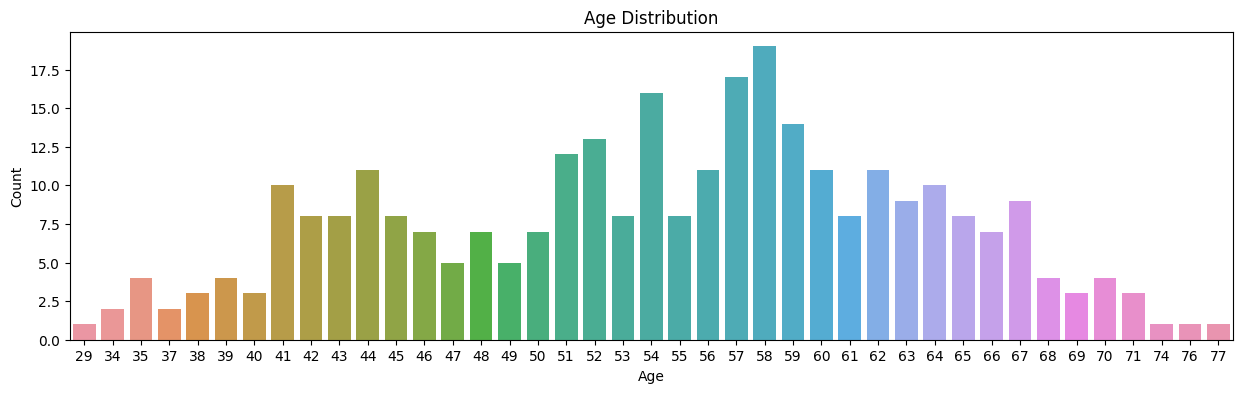

In [39]:
plt.figure(figsize=(15,4))
sns.countplot(x=heart_data['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

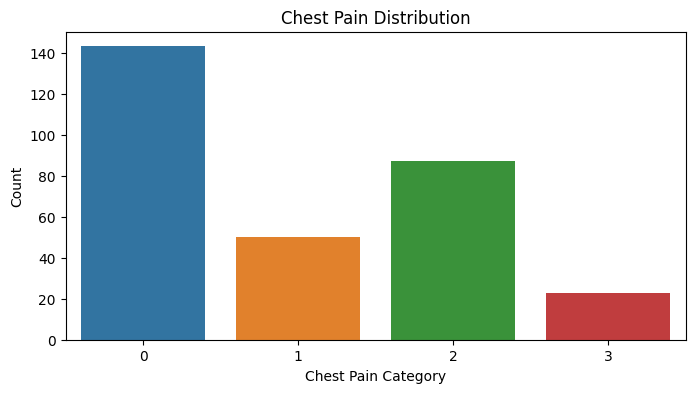

In [40]:
plt.figure(figsize=(8,4))
sns.countplot(x=heart_data['Chest Pain Type'])
plt.xlabel('Chest Pain Category')
plt.ylabel('Count')
plt.title('Chest Pain Distribution')
plt.show()

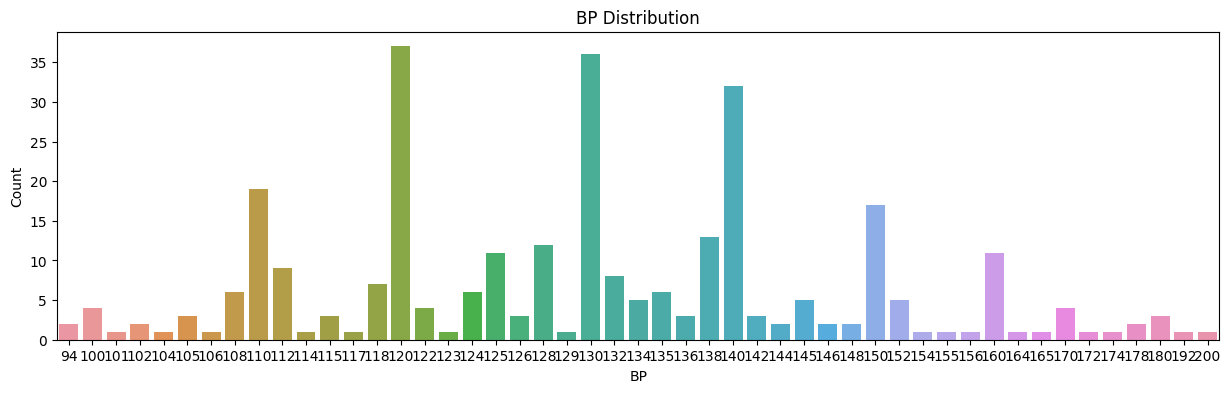

In [41]:
plt.figure(figsize=(15,4))
sns.countplot(x=heart_data['Resting BP'])
plt.xlabel('BP')
plt.ylabel('Count')
plt.title('BP Distribution')
plt.show()

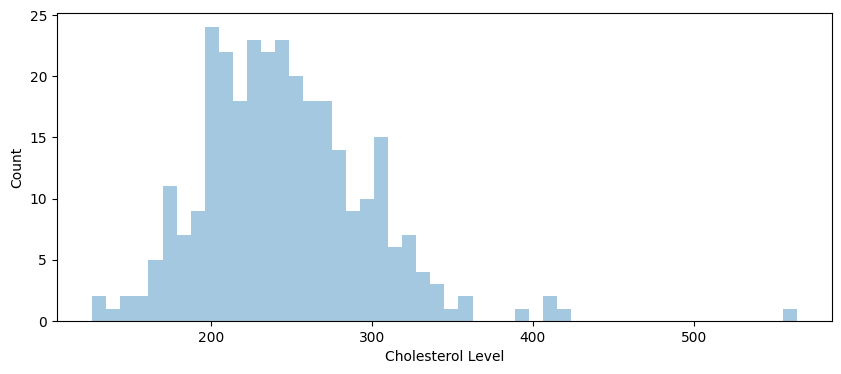

In [42]:
plt.figure(figsize=(10,4))
sns.distplot(heart_data['Serum Cholestrol'], kde=False, bins=50)
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.show()

In [43]:
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

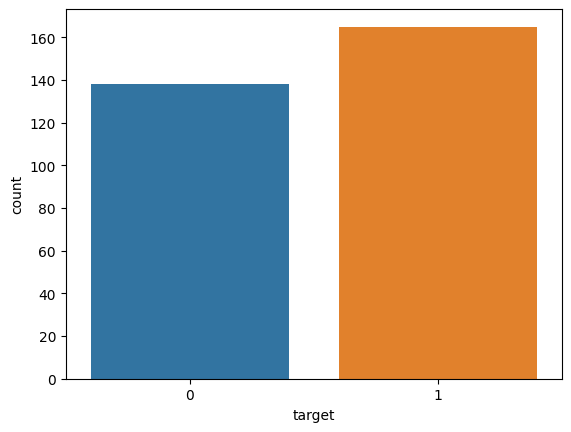

In [44]:
sns.countplot(x='target', data=heart_data)

1 --> Defective Heart

0 --> Healthy Heart

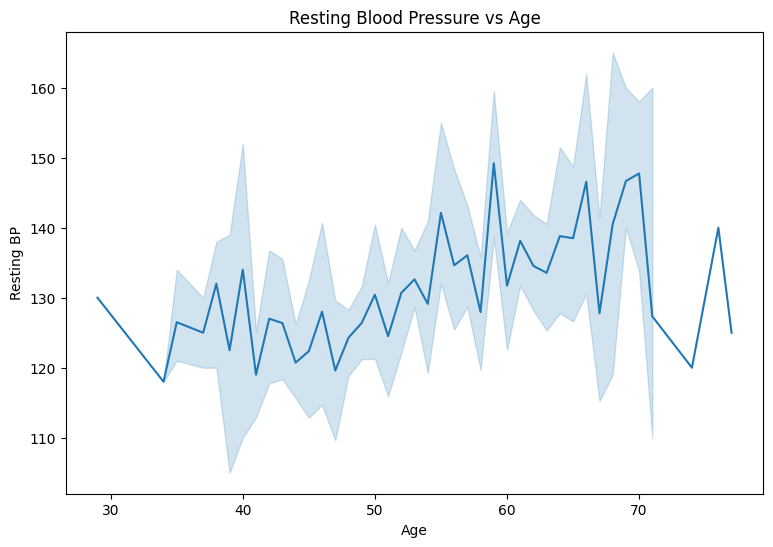

In [45]:
# Age vs Blood Pressure at rest
plt.figure(figsize=(9,6))
sns.lineplot(x="Age", y="Resting BP", data=heart_data)
plt.title("Resting Blood Pressure vs Age")
plt.show()

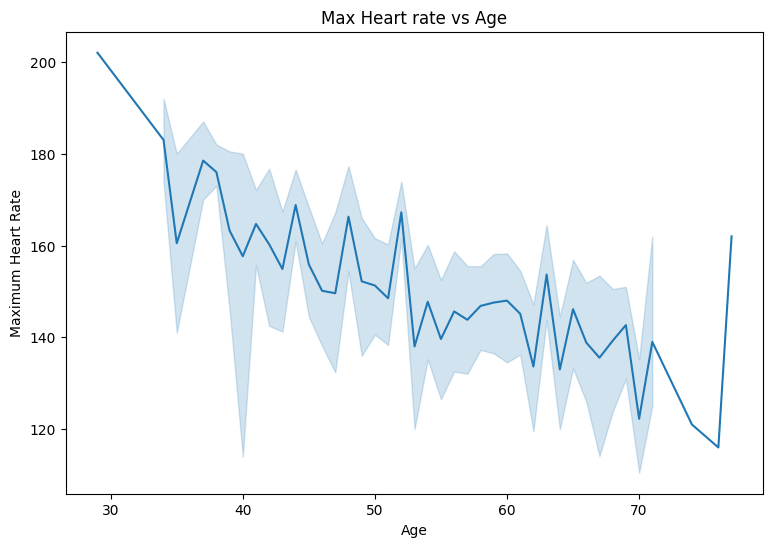

In [46]:
# Age vs Max heart rate
plt.figure(figsize=(9,6))
sns.lineplot(x="Age", y="Maximum Heart Rate", data=heart_data)
plt.title("Max Heart rate vs Age")
plt.show()

Splitting the Features and Target

In [47]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

Training-Test Split

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=4)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Model Training

**Logistic Regression**

In [50]:
from sklearn.linear_model import LogisticRegression
from numpy.random.mtrand import logistic
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [51]:
# Training Data Accuracy
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)*100
print('Training Data Accuracy : %.2f'%training_data_accuracy,"%")

# Test Data Accuracy
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)*100
print('Test Data Accuracy :     %.2f'%test_data_accuracy,"%")

Training Data Accuracy : 82.64 %
Test Data Accuracy :     88.52 %


In [52]:
print('True:', Y_test.values[0:10])
print('Pred:', X_test_prediction[0:10])
precision=precision_score(Y_test,X_test_prediction)
print("Precision is %.2f"%(precision*100))

True: [0 1 1 0 0 0 1 0 1 1]
Pred: [0 1 1 1 0 0 1 0 1 1]
Precision is 84.21


**K-Nearest Neighbours**

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [54]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(X_train)
x_test = sc_x.transform(X_test)

In [55]:
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(x_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [56]:
y_pred = classifier.predict(X_test)
print("Using KNN Model")
acc=accuracy_score(Y_test,y_pred)*100
print("Accuracy:   %.2f"%acc,"%")
print("F1 Score:  ",np.round(f1_score(Y_test,y_pred, average="macro"),5))
print("Precision: ",np.round(precision_score(Y_test,y_pred, average="macro"),5))
print("Recall:    ",np.round(recall_score(Y_test,y_pred, average="macro"),5))

Using KNN Model
Accuracy:   60.66 %
F1 Score:   0.5978
Precision:  0.60248
Recall:     0.59848


**Support Vector Machines (SVM) Model**

In [57]:
from sklearn import svm

In [58]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
y_pred
print("Using SVM Model")
acc=accuracy_score(Y_test,y_pred)*100
print("Accuracy:   %.2f"%acc,"%")
print("F1 Score:  ",np.round(f1_score(Y_test,y_pred, average="macro"),5))
print("Precision: ",np.round(precision_score(Y_test,y_pred, average="macro"),5))
print("Recall:    ",np.round(recall_score(Y_test,y_pred, average="macro"),5))

Using SVM Model
Accuracy:   70.49 %
F1 Score:   0.68007
Precision:  0.73958
Recall:     0.68669


**Random Forest Model**

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf = RandomForestClassifier(random_state=3, max_features=0.1, min_samples_leaf=3, min_samples_split=8,n_estimators=750)
rf.fit(X_train,Y_train)

rf_predicted = rf.predict(X_test)
rf_acc_score = accuracy_score(Y_test, rf_predicted)*100
print("Using Random Forest")
print("Accuracy:   %.2f"%rf_acc_score,"%")
print("Precision:  %.5f"%np.round(precision_score(Y_test,rf_predicted, average="macro"),5))
print("F1 Score:  ",np.round(f1_score(Y_test,rf_predicted, average="macro"),5))
print("Recall:    ",np.round(recall_score(Y_test,rf_predicted, average="macro"),5))

Using Random Forest
Accuracy:   88.52 %
Precision:  0.89931
F1 Score:   0.88208
Recall:     0.87771


In [61]:
print('True:', Y_test.values[0:10])
print('Pred:', rf_predicted[0:10])

True: [0 1 1 0 0 0 1 0 1 1]
Pred: [0 1 1 1 1 0 1 0 1 1]


In [62]:
# Accuracy is highest using Logistic Regression
input_data=input("Enter the reading values : ")
inTuple=tuple(map(float, input_data.split(',')))
numpy_array = np.asarray(inTuple)

# reshape the numpy array as we are predicting for only on instance
reshaped = numpy_array.reshape(1,-1)
prediction = model.predict(reshaped)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

Enter the reading values : 48,1,0,124,274,0,0,166,0,0.5,1,0,3
The Person does not have a Heart Disease
